In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix  
from sklearn.linear_model import LinearRegression


In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


/home/apcuser/miniconda3/envs/py37_tens/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

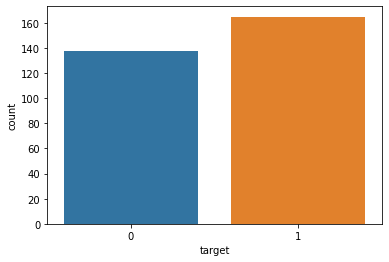

In [4]:
sns.countplot(df['target'])

In [5]:
x= df.iloc[:,0:13].values 
y= df['target'].values  

In [6]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)  

In [7]:
from sklearn.preprocessing import StandardScaler    
st_x= StandardScaler()    
x_train= st_x.fit_transform(x_train)    
x_test= st_x.transform(x_test)  

Minimum error:- 0.13157894736842105 at K = 7


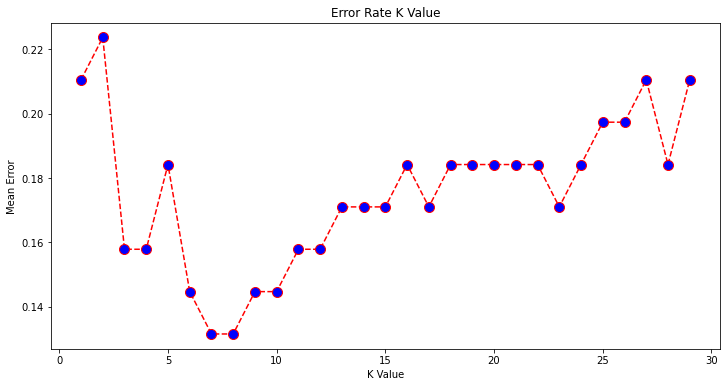

In [8]:
error = []
# Calculating error for K values between 1 and 30
for i in range(1, 30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12, 6))
plt.plot(range(1, 30), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error),"at K =",error.index(min(error))+1)

In [9]:
classifier= KNeighborsClassifier(n_neighbors=7)  
classifier.fit(x_train, y_train)  

KNeighborsClassifier(n_neighbors=7)

In [10]:
y_pred= classifier.predict(x_test)  

In [11]:
cm= confusion_matrix(y_test, y_pred)  
cm

array([[26,  7],
       [ 3, 40]])

In [12]:
accuracy_score(y_test, y_pred)

0.868421052631579

In [13]:
classifier=LinearRegression(fit_intercept=False)
classifier.fit(x_train, y_train)  

LinearRegression(fit_intercept=False)

In [14]:
y_pred= classifier.score(x_test,y_test)  
y_pred

-0.7738916821438548